# Introduction:
The dataset was downloaded from [kaggle] (https://www.kaggle.com/osmi/mental-health-in-tech-survey).
The title of the dataset is "Survey on Mental Health in the Tech Workplace in 2014".


## Main conclusions:

### 1. Partial participant describtion
Participants of the study were mostly male (77%) and the average age was 32 years.
The majority of participants originates from the US.
More than 80% of participants work for a Tech company. The distribution of genders is equal comapring tech and not tech companies.
### 2. Describtion of factors associated with mental health issues
Half of the participants have thought treatment for mental health issues.
Gender is an important factor in regard to mental health issues for workers in the tech industry.
Around 70% of women and of 65% of trans people have sought treatment for mental health issues, where as less than 50% of men have.
Further, people with a family history of mental health issues are also much more likely to seek help for themselfes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('mental-health-in-tech-survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## 1. Partial participant describtion

### How old where the participants and of which gender? 
### Where are they from?

Male participants:  77.62 %
Average age of male participants:  32 years
Female participants:  19.34 %
Average age of female participants:  31 years
Trans participants:  3.04 %
Average age of trans participants:  32 years


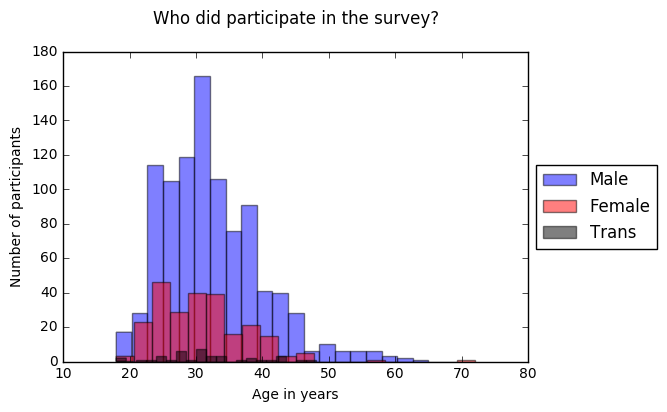

In [3]:
#print(len(data))
AgeGender = data[['Age','Gender']]

#print(len(AgeGender))
#Clean Age column
AgeGender.sort_values(by=['Age'])
AgeGender = AgeGender[(AgeGender['Age'] >=18) & (AgeGender['Age']<100)]
#print(len(AgeGender))

#Clean Gender column
AgeGender['Gender'] = AgeGender['Gender'].str.strip()
Genderlist = ['M', 'F', 'Male', 'Female', 'male', 'female', 'woman','Woman', 'man','Man','m','f']
Males = ['M', 'Male', 'male', 'man','Man','m']
Females = ['F', 'Female','female', 'woman','Woman', 'f']
Males = AgeGender.loc[AgeGender['Gender'].isin(Males)]
print("Male participants: ",round(len(Males)/len(AgeGender)*100,2),"%")
print("Average age of male participants: ",round(Males.Age.mean()),"years")
Females = AgeGender.loc[AgeGender['Gender'].isin(Females)]
print("Female participants: ",round(len(Females)/len(AgeGender)*100,2),"%")
print("Average age of female participants: ",round(Females.Age.mean()),"years")

Trans = AgeGender.loc[~AgeGender['Gender'].isin(Genderlist)]
print("Trans participants: ",round(len(Trans)/len(AgeGender)*100,2),"%")
print("Average age of trans participants: ",round(Trans.Age.mean()),"years")


#Others

#Make histograms
plt.hist(Males['Age'], bins=20, color='blue',alpha=0.5, label='Male')
plt.hist(Females['Age'], bins=20, color='red',alpha=0.5, label= 'Female')
plt.hist(Trans['Age'], bins=20, color='black', alpha=0.5,label= 'Trans')
plt.legend(loc='upper right') 
plt.xlabel('Age in years')
plt.ylabel('Number of participants')
plt.title('Who did participate in the survey?\n')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

The majority of participants is male (77%), 19% are female and 3% identify themselfes as trans.
The average age of the participant is 32 years.

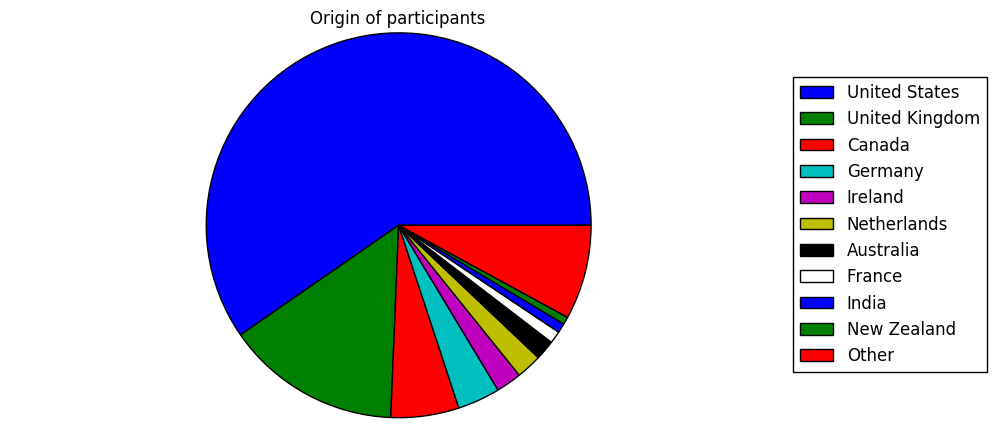

In [4]:
cntry_counts = pd.DataFrame(data.Country.value_counts())
other = int(cntry_counts[10:].sum())
cntry_counts = cntry_counts[:10]
cntry_counts.loc[11] = other
cntry_counts = cntry_counts.rename(index={11: 'Other'})
#print(cntry_counts.head())

# Generate Pie Chart
#Change colors in plt.pie(colors=colors)
plt.figure(figsize=(10, 5))
plt.pie(cntry_counts.Country)#autopct='%1.1f%%'
plt.axis('equal')
plt.title('Origin of participants')
plt.legend(cntry_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

More than 50% of participants come from the US, followed by the UK and Canada.

### How many participants work in the tech industry? 
### Is there an equal amout of each gender group represented in the different work areas?

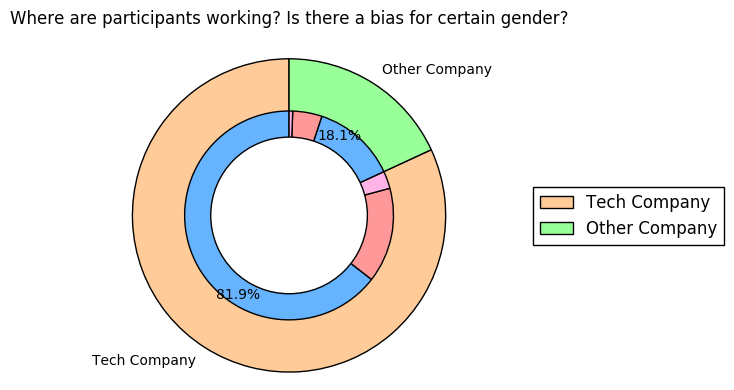

In [5]:
data['Gender'] = data['Gender'].str.strip()
Genderlist = ['M', 'F', 'Male', 'Female', 'male', 'female', 'woman','Woman', 'man','Man','m','f']
Males = ['M', 'Male', 'male', 'man','Man','m']
Females = ['F', 'Female','female', 'woman','Woman', 'f']
Males = data.loc[data['Gender'].isin(Males)]
#print(len(Males))
Females = data.loc[data['Gender'].isin(Females)]
#print(len(Females))
Others = data.loc[~data['Gender'].isin(Genderlist)]
#print(len(Others))

#Tech-Employment distribution
#In general
ParticipantsInTech = data[data['tech_company']=='Yes']
ParticipantsNotInTech = data[data['tech_company']!='Yes']

#By Gender
FemalesNotInTech = Females[Females['tech_company']=='No']
FemalesInTech = Females[Females['tech_company']=='Yes']
MalesNotInTech = Males[Males['tech_company']=='No']
MalesInTech = Males[Males['tech_company']=='Yes']
OthersNotInTech = Others[Others['tech_company']!='Yes']
OthersInTech = Others[Others['tech_company']=='Yes']

#Tech-distribution
#Exploding does not work properly
# Data to plot
labels = ['Tech Company', 'Other Company']
sizes = [len(ParticipantsInTech), len(ParticipantsNotInTech)]
colors = ['#ffcc99', '#99ff99']
#explode = (0.2,0.2) 

labels_gender = ['Male', 'Female', 'Others','Male', 'Female', 'Others']
sizes_gender = [len(MalesInTech), len(FemalesInTech), len(OthersInTech),len(MalesNotInTech), len(FemalesNotInTech), len(OthersNotInTech)]
colors_gender = ['#66b3ff','#ff9999','#ffb3e6','#66b3ff','#ff9999','#ffb3e6']
#explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1)


#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, autopct='%1.1f%%',radius=3)#explode=explode,
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.pie(sizes_gender,colors=colors_gender,startangle=90, radius=2) #explode=explode_gender,
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#Draw circle do make it a donut
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.title('Where are participants working? Is there a bias for certain gender?\n')
plt.tight_layout()
plt.show()

More than 80% of participants work for a Tech company.
The distribution of genders is equal comapring tech and not tech companies.

## 2. Describtion of factors associated with mental health issues
### How many people taking the survey have sought treatment for mental health issues?

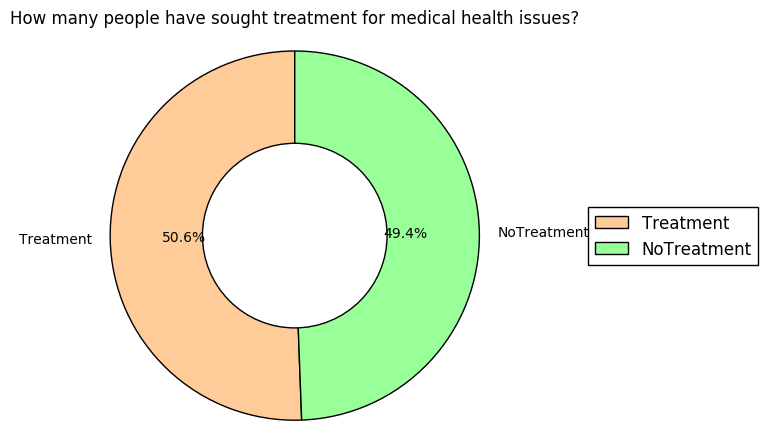

In [6]:
#Who has sought treatment for mental helath issues
Treatment = data[data['treatment']=='Yes']
NoTreatment = data[data['treatment']=='No']
#print(len(Treatment))
#print(len(NoTreatment))

# Data to plot
labels = ['Treatment', 'NoTreatment']
sizes = [len(Treatment), len(NoTreatment)]
colors = ['#ffcc99', '#99ff99']
#explode = (0.2,0.2) 

#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%',radius=3)#explode=explode,
#Draw circle do make it a donut
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.title('How many people have sought treatment for medical health issues?\n')
plt.show()

Half of the participants have thought treatment for mental health issues.

### Is a certain gender more likely to seek help for mental health problems?

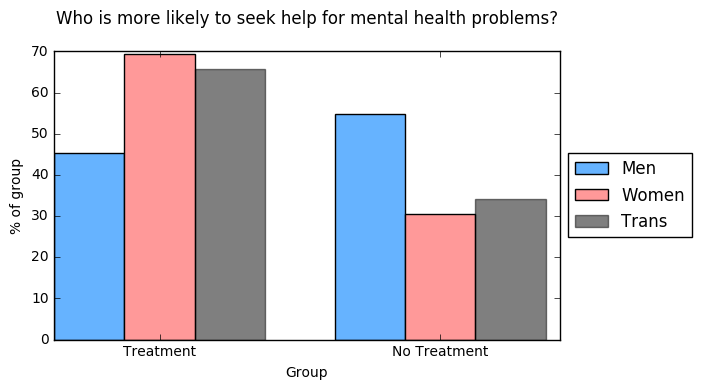

In [7]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

data['Gender'] = data['Gender'].str.strip()
Genderlist = ['M', 'F', 'Male', 'Female', 'male', 'female', 'woman','Woman', 'man','Man','m','f']
Males = ['M', 'Male', 'male', 'man','Man','m']
Females = ['F', 'Female','female', 'woman','Woman', 'f']
Males = data.loc[data['Gender'].isin(Males)]
#print(len(Males))
Females = data.loc[data['Gender'].isin(Females)]
#print(len(Females))
Trans = data.loc[~data['Gender'].isin(Genderlist)]

#Who has sought treatment for mental helath issues
Treatment = data[data['treatment']=='Yes']
NoTreatment = data[data['treatment']=='No']
#print(len(Treatment))
#print(len(NoTreatment))

#Treatment By gender
FemalesTreatment = Females[Females['treatment']=='Yes']
FemalesNoTreatment = Females[Females['treatment']!='Yes']
MalesTreatment = Males[Males['treatment']=='Yes']
MalesNoTreatment = Males[Males['treatment']!='Yes']
TransTreatment = Trans[Trans['treatment']=='Yes']
TransNoTreatment = Trans[Trans['treatment']!='Yes']

N = 2
men = (len(MalesTreatment)/len(Males)*100, len(MalesNoTreatment)/len(Males)*100)
women = (len(FemalesTreatment)/len(Females)*100, len(FemalesNoTreatment)/len(Females)*100)
trans = (len(TransTreatment)/len(Trans)*100, len(TransNoTreatment)/len(Trans)*100)

fig, ax = plt.subplots()
index = np.arange(N)    # the x locations for the groups
bar_width = 0.25      # the width of the bars: can also be len(x) sequence

rects1 = ax.bar(index, men, bar_width, color='#66b3ff',label='Men')
rects2 = ax.bar(index+ bar_width, women, bar_width, color='#ff9999',label='Women')
rects3 = ax.bar(index + (2*bar_width), trans, bar_width, color='black', alpha=0.5,label='Trans')

ax.set_xlabel('Group')
ax.set_ylabel('% of group')
ax.set_title('Who is more likely to seek help for mental health problems?\n')
ax.set_xticks(index + 1.5*bar_width)
ax.set_xticklabels(('Treatment', 'No Treatment'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

Women and trans people are much more likely to seek treatment for mental health problems.

### How old are those who seek treatment?

C:\Users\Ruecker-PC\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


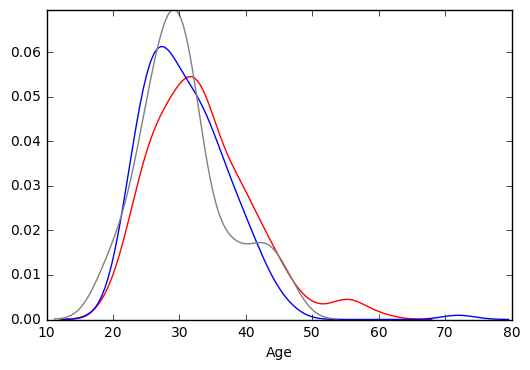

In [8]:
AgeTreat = data[['Age', 'treatment', 'Gender']]
AgeTreat = AgeTreat[AgeTreat['Age']<100]
AgeTreat = AgeTreat[AgeTreat['Age']>18]

# Sort the dataframe by Treatment
Treatment = AgeTreat[AgeTreat['treatment']=='Yes']

AgeTreat['Gender'] = AgeTreat['Gender'].str.strip()
Genderlist = ['M', 'F', 'Male', 'Female', 'male', 'female', 'woman','Woman', 'man','Man','m','f']
Males = ['M', 'Male', 'male', 'man','Man','m']
Females = ['F', 'Female','female', 'woman','Woman', 'f']
Males = AgeTreat.loc[AgeTreat['Gender'].isin(Males)]
#print(len(Males))
Females = AgeTreat.loc[AgeTreat['Gender'].isin(Females)]
#print(len(Females))
Trans = AgeTreat.loc[~AgeTreat['Gender'].isin(Genderlist)]

#Treatment By gender
FemalesTreatment = Females[Females['treatment']=='Yes']
MalesTreatment = Males[Males['treatment']=='Yes']
TransTreatment = Trans[Trans['treatment']=='Yes']


# One histogram per gender type
sns.distplot(MalesTreatment[['Age']], hist=False, color="red")
sns.distplot(FemalesTreatment[['Age']], hist=False, color="blue")
sns.distplot(TransTreatment[['Age']], hist=False, color="grey")

#g = sns.FacetGrid(AgeTreat, col='treatment', size=5)
#sns.distplot( AgeTreat.Age, hue='treatment')
#plt.title("Distribuition and density by Age")
plt.xlabel("Age")

The distribution of those who seek treatment is very similar to the distribution of participants.
This analysis remains inconclusive.

### Are people with a family history of mental illness more likely to seek help?

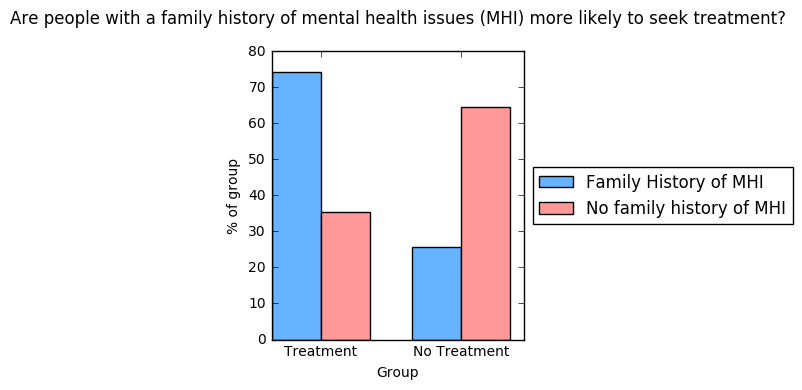

In [9]:
#Who has sought treatment for mental helath issues
Treatment = data[data['treatment']=='Yes']
#print(len(Treatment))
NoTreatment = data[data['treatment']=='No']
#print(len(NoTreatment))

Familyhistory = data[data['family_history']=='Yes']
NoFamilyhistory = data[data['family_history']=='No']


#Treatment By Family history
TreatmentFamilyhistory = Treatment[Treatment['family_history']=='Yes']
#print(len(TreatmentFamilyhistory))
TreatmentNoFamilyhistory = Treatment[Treatment['family_history']=='No']
#print(len(TreatmentNoFamilyhistory))
NoTreatmentFamilyhistory = NoTreatment[NoTreatment['family_history']=='Yes']
#print(len(NoTreatmentFamilyhistory))
NoTreatmentNoFamilyhistory = NoTreatment[NoTreatment['family_history']=='No']
#print(len(NoTreatmentNoFamilyhistory))

N = 2
FamilyHistostry = (len(TreatmentFamilyhistory)/len(Familyhistory) *100, len(NoTreatmentFamilyhistory)/len(Familyhistory)*100)
NoFamilyHistory = (len(TreatmentNoFamilyhistory)/len(NoFamilyhistory)*100, len(NoTreatmentNoFamilyhistory)/len(NoFamilyhistory)*100)

fig, ax = plt.subplots()
index = np.arange(N)    # the x locations for the groups
bar_width = 0.35      # the width of the bars: can also be len(x) sequence


rects1 = ax.bar(index, FamilyHistostry , bar_width, color='#66b3ff',label='Family History of MHI')
rects2 = ax.bar(index+ bar_width, NoFamilyHistory, bar_width, color='#ff9999',label='No family history of MHI')

ax.set_xlabel('Group')
ax.set_ylabel('% of group')
ax.set_title('Are people with a family history of mental health issues (MHI) more likely to seek treatment?\n')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(('Treatment', 'No Treatment'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.tight_layout()
plt.show()

Yes, people who have a family history of mental health issues are more likely to seek help for themselfes.

